# HW3 Question 2

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
%matplotlib inline

# Q2-a

In [2]:
# Let's frist read the data. We don't want the header to be part of raw data.
data = pd.read_csv('n90pol.csv',header=0)
data.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


In [3]:
# change it from dataframe to numpy ndarray
data = data.to_numpy()
y = data[:,2]
data = data[:,:2]

# Let's scale the data using sklearn functions
ndata = preprocessing.scale(data)
m, n = ndata.shape

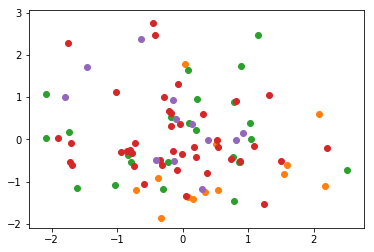

In [4]:
# Let's look at the data in the scatter plot form. 
plt.scatter(ndata[np.where(y == 1),0],ndata[np.where(y == 1),1])
plt.scatter(ndata[np.where(y == 2),0],ndata[np.where(y == 2),1])
plt.scatter(ndata[np.where(y == 3),0],ndata[np.where(y == 3),1])
plt.scatter(ndata[np.where(y == 4),0],ndata[np.where(y == 4),1])
plt.scatter(ndata[np.where(y == 5),0],ndata[np.where(y == 5),1])
#plt.show()

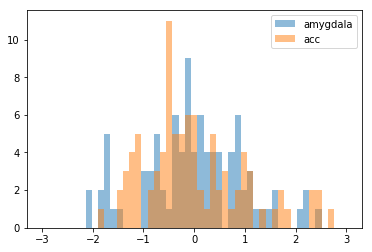

In [5]:
# Let's look into the histogram for both amygdala and acc data.
# looks like around -1 and 1 we have some condenced data.
# The distribution of both data around is around (-1, 1)

# For simple histogram figures, matplotlib has good function. 
# I prefer this method compared to the one from the class example.

x = ndata[:,0]
y = ndata[:,1]

bins = np.linspace(-3, 3, 50)

plt.hist(x, bins, alpha=0.5, label='amygdala')
plt.hist(y, bins, alpha=0.5, label='acc')
plt.legend(loc='upper right')
plt.show()


Text(0.5,0,'acc')

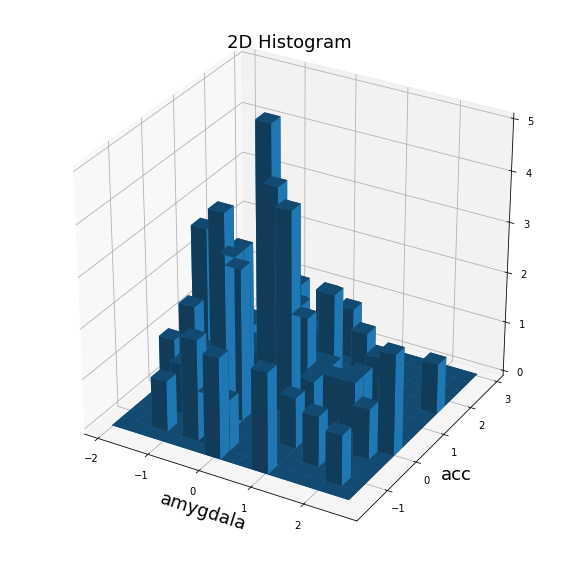

In [10]:
# for 2 dimensional data. I mainly used the sample code from class. 
# I picked 20 bin and noticed that it can be compared with my triditional historgram we showed 
# few cells above.
#In the report, I provided three results. Bin = 5, 10, 15

min_data = ndata.min(0)
max_data = ndata.max(0)
nbin = 15        # you can change the number of bins in each dimension
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(ndata[:,0], ndata[:,1], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
ax.set_title('2D Histogram', fontdict={'fontsize': 18})
ax.set_xlabel('amygdala', fontdict={'fontsize': 18})
ax.set_ylabel('acc', fontdict={'fontsize': 18})


Text(0,0.5,'acc')

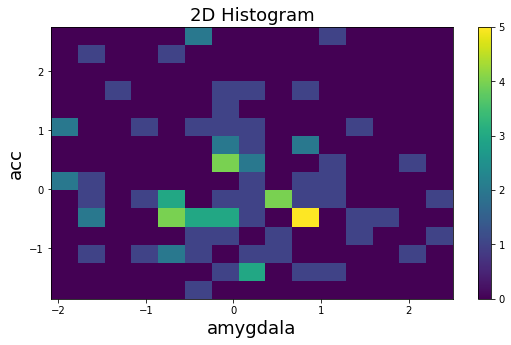

In [14]:
# another 2D histogram but looking flat from above. 
# I prever the previous one. 

x = ndata[:,0]
y = ndata[:,1]

fig, ax = plt.subplots(figsize=(9, 5))
H = ax.hist2d(x, y, bins=15)
fig.colorbar(H[3], ax=ax)
ax.set_title('2D Histogram', fontdict={'fontsize': 18})
ax.set_xlabel('amygdala', fontdict={'fontsize': 18})
ax.set_ylabel('acc', fontdict={'fontsize': 18})

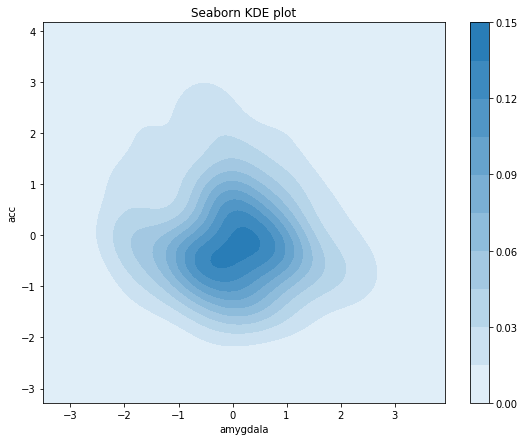

In [26]:
import seaborn as sns

x = ndata[:,0]
y = ndata[:,1]

fig = plt.figure(figsize=(9, 7))
sns.kdeplot(x, y, shade=True, cbar=True, bw='silverman' )
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('Seaborn KDE plot');

# Q2-b

In [15]:
#kernel density estimator. This is also inspired by the KDE from the sample code.
# Create the grid based on our data

gridno = 40
inc1 = (max_data[0]-min_data[0])/gridno
inc2 = (max_data[1]-min_data[1])/gridno
gridx, gridy = np.meshgrid( np.arange(min_data[0], max_data[0]+inc1,inc1), \
                            np.arange(min_data[1], max_data[1]+inc2,inc2) )
gridall = [gridx.flatten(order = 'F'), gridy.flatten(order = 'F')]
gridall = (np.asarray(gridall)).T
gridallno, nn= gridall.shape


In [16]:

norm_ndata = (np.power(ndata, 2)).sum(axis=1)
norm_gridall = (np.power(gridall, 2)).sum(axis=1)
cross = np.dot(ndata,gridall.T)

# compute squared distance between each data point and the grid point;
#dist2 = np.matlib.repmat(norm_pdata, 1, gridallno)
dist2 = np.repeat(norm_ndata, repeats =gridallno)\
    .reshape((len(norm_ndata), gridallno))+np.tile(norm_gridall, m) \
    .reshape((len(norm_ndata), gridallno)) - 2* cross
#choose kernel bandwidth 1; please also experiment with other bandwidth;
bandwidth = 3
#evaluate the kernel function value for each training data point and grid
kernelvalue = np.exp(-dist2)

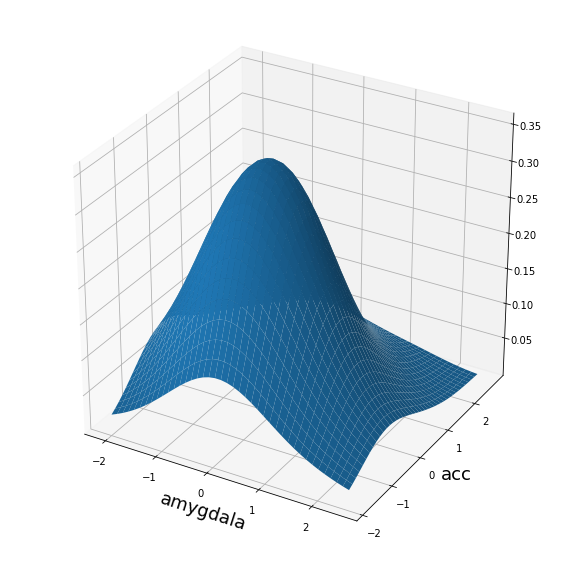

In [18]:
# sum over the training data point to the density value on the grid points;
# here I dropped the normalization factor in front of the kernel function,
# and you can add it back. It is just a constant scaling;
mkde = sum(kernelvalue) / m
#reshape back to grid;
mkde = ((mkde.T).reshape(gridno+1, gridno+1)).T
fig = plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(gridx, gridy, mkde)
ax.set_xlabel('amygdala', fontdict={'fontsize': 18})
ax.set_ylabel('acc', fontdict={'fontsize': 18})
plt.show()

# Q2-3

In [19]:
# For this section, I decided to use seaborn library. 
# the library is easy to use and easy to understand
import seaborn as sns


In [20]:
# Let's read the data again. we did some changes into the 'data' variable.
data = pd.read_csv('n90pol.csv',header=0)
data = data.to_numpy()
y = data[:,2]
data = data[:,:2]

# Let's scale the data using sklearn functions
ndata = preprocessing.scale(data)
df = pd.DataFrame(ndata)
df['oreintation'] = y
df.columns = ['amygdala','acc','orientation']
df

,amygdala,acc,orientation
0,0.157258,-1.407101,2.0
1,-2.078759,0.034720,3.0
2,-0.792664,-0.541024,3.0
3,1.554383,-0.821515,2.0
4,0.385486,-0.024331,5.0
...,...,...,...
85,0.536610,-1.190582,2.0
86,0.774090,-0.427844,3.0
87,2.084859,0.590780,2.0
88,-0.299198,-1.175819,3.0


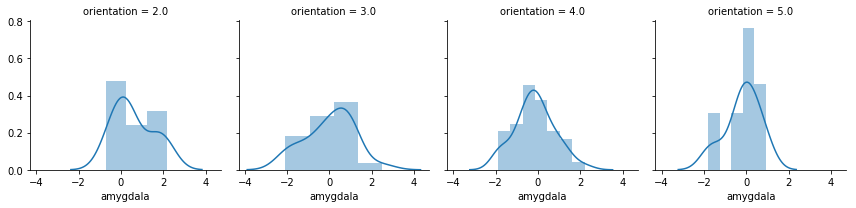

In [21]:
# This is a conditional distribution using single condition 'orientation'

# amygdala is part of the limbic system of the brain. It is the integrative center for emotions and 
# emotional behavior and motivation.
# https://nba.uth.tmc.edu/neuroscience/m/s4/chapter06.html

# looks like amygdala for orientation 5 is slighly larger than others. 
# interestingly, both spectrum, (orientaiton 2 and 5) have slight skew. One twards left and other right.

g = sns.FacetGrid(df, col = "orientation")
g.map(sns.distplot, "amygdala")

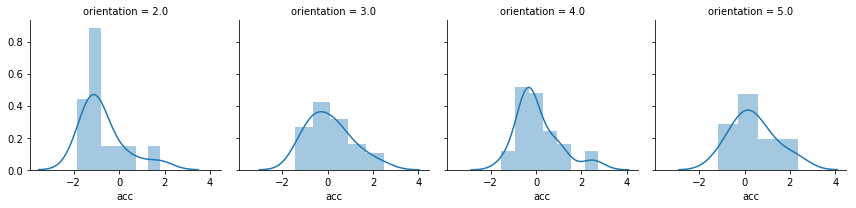

In [22]:
# anterior cingulate cortex is for complex cognitive functions empathy, impulse control, emotion, 
# and decision making. 
#https://www.neuroscientificallychallenged.com/glossary/anterior-cingulate-cortex

# acc from anterior cingulate cortex size perspective, looks like orientation 2 has larger one. 
g = sns.FacetGrid(df, col = "orientation")
g.map(sns.distplot, "acc")